In [1]:
%matplotlib inline
import cPickle 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.mlab import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.linear_model import SGDClassifier
from collections import Counter
from scipy.stats.mstats import mode
import sklearn
from math import sqrt
from scipy import stats
from sklearn.decomposition import PCA
from collections import Counter
import scipy.stats as st

In [2]:
#function to unpickle the dataset
def unpickle(file):
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict

In [28]:
#storing the unpickled data into a dictionary called my_data
my_data = {'data': unpickle("data_batch_1")['data'], 'labels': unpickle("data_batch_1")['labels']}
for each in range(2, 6):
    my_data['data'] = np.concatenate((my_data['data'], unpickle("data_batch_" + str(each))['data']), axis=0)
    my_data['labels'] = np.concatenate((my_data['labels'], unpickle("data_batch_" + str(each))['labels']), axis=0)
my_data

{'data': array([[ 59,  43,  50, ..., 140,  84,  72],
        [154, 126, 105, ..., 139, 142, 144],
        [255, 253, 253, ...,  83,  83,  84],
        ..., 
        [ 35,  40,  42, ...,  77,  66,  50],
        [189, 186, 185, ..., 169, 171, 171],
        [229, 236, 234, ..., 173, 162, 161]], dtype=uint8),
 'labels': array([6, 9, 9, ..., 9, 1, 1])}

In [4]:
# assigning the data and labels to respective lists
data = my_data['data']
labels = my_data['labels']
label_names = unpickle("batches.meta")['label_names']
data

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ..., 
       [ 35,  40,  42, ...,  77,  66,  50],
       [189, 186, 185, ..., 169, 171, 171],
       [229, 236, 234, ..., 173, 162, 161]], dtype=uint8)

In [29]:
# unpickling the test data and storing in a dictionary called test_data
test_data_dict = {}
test_data_dict.update(unpickle("test_batch"))
test_data = test_data_dict['data']
X_test = []
y_test = test_data_dict['labels']
test_data_dict

{'batch_label': 'testing batch 1 of 1',
 'data': array([[158, 159, 165, ..., 124, 129, 110],
        [235, 231, 232, ..., 178, 191, 199],
        [158, 158, 139, ...,   8,   3,   7],
        ..., 
        [ 20,  19,  15, ...,  50,  53,  47],
        [ 25,  15,  23, ...,  80,  81,  80],
        [ 73,  98,  99, ...,  94,  58,  26]], dtype=uint8),
 'filenames': ['domestic_cat_s_000907.png',
  'hydrofoil_s_000078.png',
  'sea_boat_s_001456.png',
  'jetliner_s_001705.png',
  'green_frog_s_001658.png',
  'crapaud_s_002124.png',
  'shooting_brake_s_000973.png',
  'green_frog_s_000634.png',
  'tabby_cat_s_001397.png',
  'wagon_s_002806.png',
  'plane_s_000026.png',
  'dustcart_s_000045.png',
  'toy_spaniel_s_001592.png',
  'lippizan_s_000752.png',
  'truck_s_000149.png',
  'dredger_s_001437.png',
  'puppy_s_001937.png',
  'cow_pony_s_000038.png',
  'boat_s_001450.png',
  'rana_clamitans_s_000570.png',
  'tennessee_walker_s_000353.png',
  'stealth_fighter_s_000354.png',
  'wapiti_s_001434.png',

In [6]:
#creating two empty lists for storing feature vectors
X_train = []
y_train = my_data['labels']

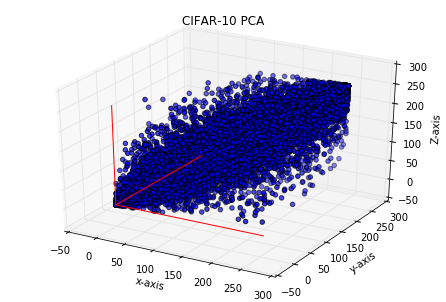

In [7]:
#plotting the feature points
x1 = []
y1 = []
z1 = []
for item in data:
 x1.append(item[0])
 y1.append(item[1])
 z1.append(item[2])
fig1 = plt.figure() 
ax = Axes3D(fig1) 
pltData = [x1,y1,z1] 
ax.scatter(pltData[0], pltData[1], pltData[2], 'bo') 


xLine = ((min(pltData[0]), max(pltData[0])), (0, 0), (0,0)) 
ax.plot(xLine[0], xLine[1], xLine[2], 'r') 
yLine = ((0, 0), (min(pltData[1]), max(pltData[1])), (0,0)) 
ax.plot(yLine[0], yLine[1], yLine[2], 'r')
zLine = ((0, 0), (0,0), (min(pltData[2]), max(pltData[2])))
ax.plot(zLine[0], zLine[1], zLine[2], 'r') 
 
 
ax.set_xlabel("x-axis") 
ax.set_ylabel("y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("CIFAR-10 PCA")
plt.show()

In [8]:
# calculating the feature vectors by extracting features such as average intensity of all pixels and max & min of pixels(training set)
# segmenting image into 4 parts
for each in range(0, 50000):
    p1dr = data[each][0:256]
    p1dg = data[each][1024:1280]
    p1db = data[each][2048:2304]
    p2dr = data[each][256:512]
    p2dg = data[each][1280:1536]
    p2db = data[each][2304:2560]
    p3dr = data[each][512:768]
    p3dg = data[each][1536:1792]
    p3db = data[each][2560:2816]
    p4dr = data[each][768:1024]
    p4dg = data[each][1972:2048]
    p4db = data[each][2816:3072]
    
    feat = []
    
    #count number of rgb pixels and find average
    redcount = 0;
    greencount = 0;
    bluecount = 0;
    for x in range(0, 256):
        redcount += data[each][x]
    for x in range(1024, 1280):
        greencount += data[each][x]
    for x in range(2048, 2304):
        bluecount += data[each][x]
    feat.append(redcount/768) 
    feat.append(greencount/768)
    feat.append(bluecount/768)
    feat.append(np.amax(p1dr))
    feat.append(np.amax(p1dg))
    feat.append(np.amax(p1db))
    feat.append(np.amin(p1dr))
    feat.append(np.amin(p1dg))
    feat.append(np.amin(p1db))

    #count number of rgb pixels and find average
    redcount = 0;
    greencount = 0;
    bluecount = 0;
    for x in range(256,512):
        redcount += data[each][x]
    for x in range(1280,1536):
        greencount += data[each][x]
    for x in range(2304,2560):
        bluecount += data[each][x]
    feat.append(redcount/768) 
    feat.append(greencount/768)
    feat.append(bluecount/768)
    feat.append(np.amax(p2dr))
    feat.append(np.amax(p2dg))
    feat.append(np.amax(p2db))
    feat.append(np.amin(p2dr))
    feat.append(np.amin(p2dg))
    feat.append(np.amin(p2db))

    #count number of rgb pixels and find average
    redcount = 0;
    greencount = 0;
    bluecount = 0;
    for x in range(512,768):
        redcount += data[each][x]
    for x in range(1536,1792):
        greencount += data[each][x]
    for x in range(2560,2816):
        bluecount += data[each][x]
    feat.append(redcount/768) 
    feat.append(greencount/768)
    feat.append(bluecount/768)
    feat.append(np.amax(p3dr))
    feat.append(np.amax(p3dg))
    feat.append(np.amax(p3db))
    feat.append(np.amin(p3dr))
    feat.append(np.amin(p3dg))
    feat.append(np.amin(p3db))

    #count number of rgb pixels and find average
    redcount = 0;
    greencount = 0;
    bluecount = 0;
    for x in range(768,1024):
        redcount += data[each][x]
    for x in range(1792,2048):
        greencount += data[each][x]
    for x in range(2816,3072):
        bluecount += data[each][x]
    feat.append(redcount/768) 
    feat.append(greencount/768)
    feat.append(bluecount/768)
    feat.append(np.amax(p4dr))
    feat.append(np.amax(p4dg))
    feat.append(np.amax(p4db))
    feat.append(np.amin(p4dr))
    feat.append(np.amin(p4dg))
    feat.append(np.amin(p4db))

    X_train.append(feat)

In [9]:
# calculating the feature vectors by extracting features such as average intensity of all pixels and max & min of pixels(test set)
# segmenting image into 4 parts
for each in range(0, 10000):
    p1dr = test_data[each][0:256]
    p1dg = test_data[each][1024:1280]
    p1db = test_data[each][2048:2304]
    p2dr = test_data[each][256:512]
    p2dg = test_data[each][1280:1536]
    p2db = test_data[each][2304:2560]
    p3dr = test_data[each][512:768]
    p3dg = test_data[each][1536:1792]
    p3db = test_data[each][2560:2816]
    p4dr = test_data[each][768:1024]
    p4dg = test_data[each][1972:2048]
    p4db = test_data[each][2816:3072]
    
    feat1 = []
    
    #count number of rgb pixels and find average
    redcount = 0;
    greencount = 0;
    bluecount = 0;
    for x in range(0, 256):
        redcount += test_data[each][x]
    for x in range(1024, 1280):
        greencount += test_data[each][x]
    for x in range(2048, 2304):
        bluecount += test_data[each][x]
    feat1.append(redcount/768) 
    feat1.append(greencount/768)
    feat1.append(bluecount/768)
    feat1.append(np.amax(p1dr))
    feat1.append(np.amax(p1dg))
    feat1.append(np.amax(p1db))
    feat1.append(np.amin(p1dr))
    feat1.append(np.amin(p1dg))
    feat1.append(np.amin(p1db))

    #count number of rgb pixels and find average
    redcount = 0;
    greencount = 0;
    bluecount = 0;
    for x in range(256,512):
        redcount += test_data[each][x]
    for x in range(1280,1536):
        greencount += test_data[each][x]
    for x in range(2304,2560):
        bluecount += test_data[each][x]
    feat1.append(redcount/768) 
    feat1.append(greencount/768)
    feat1.append(bluecount/768)
    feat1.append(np.amax(p2dr))
    feat1.append(np.amax(p2dg))
    feat1.append(np.amax(p2db))
    feat1.append(np.amin(p2dr))
    feat1.append(np.amin(p2dg))
    feat1.append(np.amin(p2db))

    #count number of rgb pixels and find average
    redcount = 0;
    greencount = 0;
    bluecount = 0;
    for x in range(512,768):
        redcount += test_data[each][x]
    for x in range(1536,1792):
        greencount += test_data[each][x]
    for x in range(2560,2816):
        bluecount += test_data[each][x]
    feat1.append(redcount/768) 
    feat1.append(greencount/768)
    feat1.append(bluecount/768)
    feat1.append(np.amax(p3dr))
    feat1.append(np.amax(p3dg))
    feat1.append(np.amax(p3db))
    feat1.append(np.amin(p3dr))
    feat1.append(np.amin(p3dg))
    feat1.append(np.amin(p3db))

    #count number of rgb pixels and find average
    redcount = 0;
    greencount = 0;
    bluecount = 0;
    for x in range(768,1024):
        redcount += test_data[each][x]
    for x in range(1792,2048):
        greencount += test_data[each][x]
    for x in range(2816,3072):
        bluecount += test_data[each][x]
    feat1.append(redcount/768) 
    feat1.append(greencount/768)
    feat1.append(bluecount/768)
    feat1.append(np.amax(p4dr))
    feat1.append(np.amax(p4dg))
    feat1.append(np.amax(p4db))
    feat1.append(np.amin(p4dr))
    feat1.append(np.amin(p4dg))
    feat1.append(np.amin(p4db))

    X_test.append(feat1)

In [10]:
#computing the principle components
X = np.array(X_train)
pca = PCA(n_components=36)
abc = pca.fit_transform(X)
pca1 = pca.score(X)
abc,pca1

(array([[ -8.06723337e+01,   8.84292061e+01,  -4.06853284e+01, ...,
          -2.68884979e-01,  -6.61939360e-01,  -4.76063762e-01],
        [  5.11296017e+01,   1.13084336e+02,   6.89635341e+01, ...,
          -4.22173615e-01,   4.11566633e-02,  -9.18124744e-01],
        [  2.75273198e+01,   9.83693917e-01,   1.28966752e+02, ...,
          -4.50715764e-01,   4.78653370e-01,   1.01013841e+00],
        ..., 
        [ -8.99404628e+01,   2.13090594e+01,   1.93430225e+02, ...,
          -2.50112256e+00,  -8.54836868e-01,  -1.69322160e+00],
        [  2.20518596e+02,  -1.07294075e+02,   1.19646469e+02, ...,
           1.12326809e+00,   1.82206484e-01,  -2.23575475e-01],
        [  7.52791098e+01,   1.05288888e+02,  -6.32906042e+00, ...,
           7.56379613e-01,   1.25304642e+00,   2.74683246e-01]]),
 -140.90612540829534)

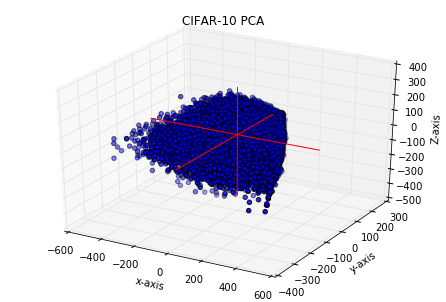

In [11]:
#plotting the principle components
x1 = []
y1 = []
z1 = []
for item in abc:
 x1.append(item[0])
 y1.append(item[1])
 z1.append(item[2])
fig1 = plt.figure() 
ax = Axes3D(fig1) 
pltData = [x1,y1,z1] 
ax.scatter(pltData[0], pltData[1], pltData[2], 'bo') 


xLine = ((min(pltData[0]), max(pltData[0])), (0, 0), (0,0)) 
ax.plot(xLine[0], xLine[1], xLine[2], 'r') 
yLine = ((0, 0), (min(pltData[1]), max(pltData[1])), (0,0)) 
ax.plot(yLine[0], yLine[1], yLine[2], 'r')
zLine = ((0, 0), (0,0), (min(pltData[2]), max(pltData[2])))
ax.plot(zLine[0], zLine[1], zLine[2], 'r') 
 
 
ax.set_xlabel("x-axis") 
ax.set_ylabel("y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("CIFAR-10 PCA")
plt.show()

In [12]:
#creating dictionaries of each class of images in training set
class_data = {'airplane': [], 'automobile': [],'bird':[],'cat':[], 'deer':[], 'dog':[],'frog':[],'horse':[], 'ship':[], 'truck':[]}

In [13]:
#creating dictionaries of each class of images in test set
class_data_test = {'airplane': [], 'automobile': [],'bird':[],'cat':[], 'deer':[], 'dog':[],'frog':[],'horse':[], 'ship':[], 'truck':[]}

In [14]:
# appending each class images in the training set based on the labels
for each in range(0, 50000):
    if y_train[each] == 0:
        class_data['airplane'].append(X_train[each])
    if y_train[each] == 1:
        class_data['automobile'].append(X_train[each])
    if y_train[each] == 2:
        class_data['bird'].append(X_train[each])
    if y_train[each] == 3:
        class_data['cat'].append(X_train[each])
    if y_train[each] == 4:    
        class_data['deer'].append(X_train[each])
    if y_train[each] == 5:     
        class_data['dog'].append(X_train[each])
    if y_train[each] == 6:    
        class_data['frog'].append(X_train[each])
    if y_train[each] == 7:    
        class_data['horse'].append(X_train[each])
    if y_train[each] == 8:    
        class_data['ship'].append(X_train[each])
    if y_train[each] == 9:    
        class_data['truck'].append(X_train[each])

In [15]:
# appending each class images in the test set based on the labels
for each in range(0, 10000):
    if y_test[each] == 0:
        class_data_test['airplane'].append(X_test[each])
    if y_test[each] == 1:
        class_data_test['automobile'].append(X_test[each])
    if y_test[each] == 2:
        class_data_test['bird'].append(X_test[each])
    if y_test[each] == 3:
        class_data_test['cat'].append(X_test[each])
    if y_test[each] == 4:    
        class_data_test['deer'].append(X_test[each])
    if y_test[each] == 5:     
        class_data_test['dog'].append(X_test[each])
    if y_test[each] == 6:    
        class_data_test['frog'].append(X_test[each])
    if y_test[each] == 7:    
        class_data_test['horse'].append(X_test[each])
    if y_test[each] == 8:    
        class_data_test['ship'].append(X_test[each])
    if y_test[each] == 9:    
        class_data_test['truck'].append(X_test[each])

In [16]:
# function to calculate mean ,variance, and standard deviation for each class of images
def get_stats(class_name):
    mean = 0
    variance = 0
    std_deviation = 0
    size = len(class_data[class_name])
    for each in class_data[class_name]:
        mean += np.mean(each)
        variance += np.var(each)
        std_deviation += np.std(each)
    mean = mean / size
    variance = variance / size
    std_deviation = std_deviation / size
    return mean, variance, std_deviation, size

In [17]:
get_stats('airplane')

(104.43596111111088, 6673.3563955247064, 80.920873059328116, 5000)

In [18]:
# function to calculate the t-value for the classes of images that are being compared
def tstat(class_name1, class_name2):
    X1 = get_stats(class_name1)[0]
    X2 = get_stats(class_name2)[0]
    S1 = get_stats(class_name1)[1]
    S2 = get_stats(class_name2)[1]
    N1=5000
    N2=5000
    t1= X1-X2
    t2= sqrt((S1/N1+S2/N2))
    t11=t1/t2
    S1 = get_stats(class_name1)[1]
    S2 = get_stats(class_name2)[1]
    sum1 =((get_stats(class_name1)[1]+get_stats(class_name2)[1]))*((get_stats(class_name1)[1]+get_stats(class_name2)[1]))
    s14 =(get_stats(class_name1)[1]*get_stats(class_name1)[1])
    s24=(get_stats(class_name2)[1]*get_stats(class_name2)[1])
    n1 = 5000*5000
    v1= 4999
    n2 = 5000*5000
    v2=4999
    sum2=  (s14/n1*v1 + s24/n2*v2)
    df1 = (sum1/sum2)
    df= df1/10000
    p_value = 2*st.t.cdf(-np.abs(t11),df)
    if p_value<= 0.5:
        print(False)
    else:
        print (True)
    return t11, df, p_value

In [19]:
tstat('airplane','deer')

False


(9.7924539711923515, 0.99470929656585927, 0.065509709905750654)

In [20]:
#performing k-means clustering with 10 clusters each for each class of images
k_means = KMeans(n_clusters=10, n_jobs=8)
k_means.fit(X_train)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=8, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [21]:
k_means.predict(class_data_test['airplane'])

array([9, 6, 5, 4, 9, 2, 9, 9, 9, 5, 8, 6, 0, 3, 2, 9, 8, 8, 9, 0, 7, 1, 9,
       4, 8, 8, 9, 9, 9, 1, 3, 0, 8, 1, 1, 3, 1, 5, 1, 9, 4, 1, 6, 1, 9, 5,
       5, 9, 2, 3, 1, 6, 9, 6, 4, 4, 1, 1, 1, 6, 8, 8, 4, 5, 5, 2, 5, 1, 4,
       9, 0, 3, 0, 6, 9, 8, 6, 6, 8, 8, 8, 9, 7, 9, 8, 6, 1, 9, 5, 1, 8, 2,
       5, 7, 0, 1, 1, 6, 8, 9, 9, 2, 6, 4, 1, 6, 1, 3, 2, 5, 3, 7, 0, 4, 1,
       1, 1, 9, 1, 1, 0, 3, 9, 2, 6, 8, 7, 8, 1, 4, 8, 6, 8, 9, 6, 8, 1, 4,
       9, 8, 1, 1, 1, 1, 6, 5, 9, 8, 8, 9, 6, 6, 0, 1, 9, 4, 1, 1, 1, 8, 1,
       0, 1, 3, 6, 6, 7, 9, 9, 6, 6, 6, 5, 1, 1, 9, 5, 6, 4, 9, 4, 3, 2, 3,
       6, 2, 0, 0, 4, 1, 9, 6, 8, 0, 5, 6, 7, 1, 9, 4, 6, 6, 5, 4, 5, 2, 1,
       9, 4, 9, 5, 5, 8, 4, 9, 5, 4, 1, 6, 6, 3, 2, 0, 6, 3, 3, 4, 1, 5, 5,
       6, 9, 7, 8, 5, 4, 1, 9, 2, 4, 1, 3, 6, 8, 9, 6, 5, 5, 9, 3, 1, 0, 3,
       6, 9, 1, 1, 6, 9, 4, 1, 6, 1, 6, 1, 0, 5, 8, 6, 6, 3, 4, 4, 6, 6, 4,
       0, 8, 1, 5, 9, 3, 6, 9, 7, 5, 5, 1, 6, 1, 6, 9, 9, 9, 6, 9, 1, 2, 1,
       8, 1,

In [22]:
# function to give the respective number of class of images in all the clusters
def get_count(class_name):
    return Counter(k_means.predict(class_data_test[class_name]))

In [23]:
get_count('truck')

Counter({0: 70,
         1: 35,
         2: 32,
         3: 223,
         4: 270,
         5: 76,
         6: 17,
         7: 19,
         8: 185,
         9: 73})

In [24]:
# function to get the probability of a particular class of images with the cluster number that it is present 
from collections import Counter
def get_prob(class_name):
    c = Counter(k_means.predict(class_data_test[class_name]))
    clusternumber = c.most_common(1)[0][0]
    val = (c.most_common(1)[0][1])
    return clusternumber, val

In [25]:
get_prob('truck')

(4, 270)

In [26]:
# performing multinomial logistic regression to find out the accuracy of the classification of images in the training set with the testing set
model = LogisticRegression(solver = "lbfgs", multi_class = "multinomial")
model = model.fit(X_train, y_train)
print model.score(X_test, y_test)

0.3807
